In [24]:
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
bot_data_path = "BotUserData/BotUserData.csv"

In [3]:
def load_csv_into_dataframe(filename):
    return pd.read_csv(bot_data_path, header=0, sep=",")

In [4]:
bot_df = load_csv_into_dataframe(bot_data_path)
# print(bot_df)
# print(bot_df.shape)

In [5]:
"""
I made an initial assumption that the less information a user shares the more likely they
are to be a bot. Below we will calculate the percentage of bots that are missing optional
column values such as "location". Additionally, we will calculate the percentage of bots that
are using the default profile, default profile image, and whether or not they are geo_enabled
"""

'\nI made an initial assumption that the less information a user shares the more likely they\nare to be a bot. Below we will calculate the percentage of bots that are missing optional\ncolumn values such as "location". Additionally, we will calculate the percentage of bots that\nare using the default profile, default profile image, and whether or not they are geo_enabled\n'

In [8]:
bot_df.isnull().sum()

id                          0
username                    0
screen_name                 0
location                 1401
url                      3960
description               343
followers                   0
following                   0
favorite_count              0
tweet_count                 0
created_at                  0
time_zone                3163
geo_enabled                 0
language                    0
profile_image_url           0
default_profile             0
default_profile_image       0
dtype: int64

In [11]:
bot_location_incomplete_percent = sum(pd.isnull(bot_df['location'])) / len(bot_df) * 100
print("Percentage of bots without a location: ", str(round(bot_location_incomplete_percent, 2)))

bot_url_incomplete_percent = sum(pd.isnull(bot_df['url'])) / len(bot_df) * 100
print("Percentage of bots without a url: ", str(round(bot_url_incomplete_percent, 2)))

bot_description_incomplete_percent = sum(pd.isnull(bot_df['description'])) / len(bot_df) * 100
print("Percentage of bots without a description: ", str(round(bot_description_incomplete_percent, 2)))

bot_timezone_incomplete_percent = sum(pd.isnull(bot_df['time_zone'])) / len(bot_df) * 100
print("Percentage of bots without a time-zone: ", str(round(bot_timezone_incomplete_percent, 2)))

bot_geoenabled_percent = sum(bot_df['geo_enabled']) / len(bot_df) * 100
print("Percentage of bots geo-enabled: ", str(round(bot_geoenabled_percent, 2)))

bot_default_profile_percent = sum(bot_df['default_profile']) / len(bot_df) * 100
print("Percentage of bots using default profile: ", str(round(bot_default_profile_percent, 2)))

bot_default_profile_image_percent = sum(bot_df['default_profile_image']) / len(bot_df) * 100
print("Percentage of bots using default profile image: ", str(round(bot_default_profile_image_percent, 2)))

Percentage of bots without a location:  25.33
Percentage of bots without a url:  71.6
Percentage of bots without a description:  6.2
Percentage of bots without a time-zone:  57.19
Percentage of bots geo-enabled:  29.07
Percentage of bots using default profile:  61.63
Percentage of bots using default profile image:  2.5


Average number of tweets for a bot:  72107.19
Tweet count standard deviation for bots:  107561.759971
Bot tweets range from  25 - 1796378


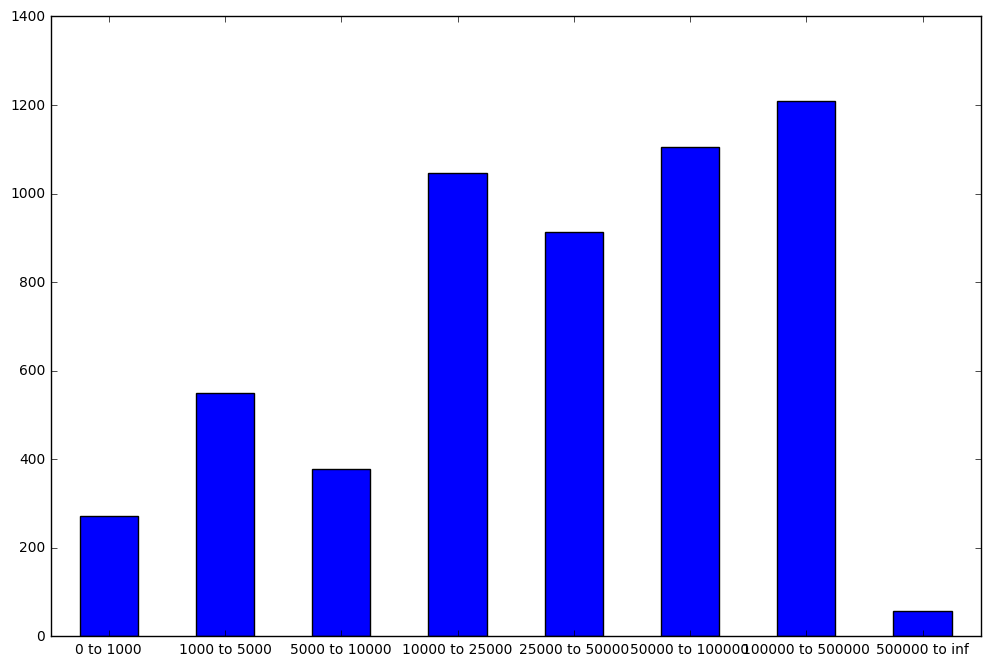

In [32]:
# Calculate the average number of tweets for bot users
#
bot_average_tweets = sum(bot_df['tweet_count']) / len(bot_df)
print("Average number of tweets for a bot: ", str(round(bot_average_tweets, 2)))

# Calculate standard deviation of tweet count
#
print("Tweet count standard deviation for bots: ", bot_df['tweet_count'].std())

# Calculate the range of tweet count
#
bot_max_tweets = bot_df['tweet_count'].max()
bot_min_tweets = bot_df['tweet_count'].min()
print("Bot tweets range from ",bot_min_tweets, "-", bot_max_tweets )

# Graph the frequency of each tweet count bin
#
out = pd.cut(bot_df['tweet_count'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,8))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

Average number of favorites for a bot:  35524.31
Favorite count standard deviation for bots:  54834.3345675
Bot tweets range from  0 - 1262898


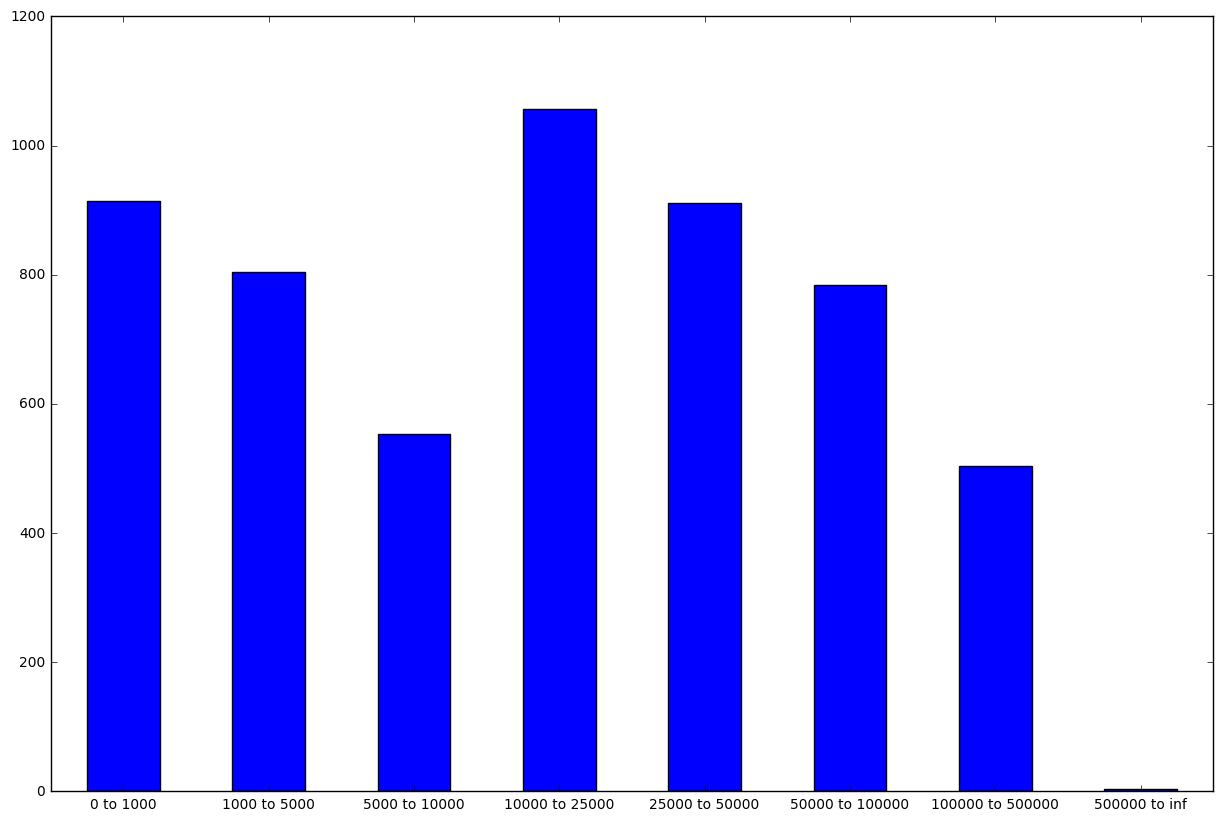

In [31]:
# Calculate the average number of favorites (likes) for bot users
#
bot_average_favorites = sum(bot_df['favorite_count']) / len(bot_df)
print("Average number of favorites for a bot: ", str(round(bot_average_favorites, 2)))

# Calculate standard deviation of favorite count
#
print("Favorite count standard deviation for bots: ", bot_df['favorite_count'].std())

# Calculate the range of favorite count
#
bot_max_favorites = bot_df['favorite_count'].max()
bot_min_favorites = bot_df['favorite_count'].min()
print("Bot tweets range from ",bot_min_favorites, "-", bot_max_favorites )

# Graph the frequency of each tweet count bin
#
out = pd.cut(bot_df['favorite_count'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,8))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

Average number of followers for a bot:  42983.9
Follower count standard deviation for bots:  206026.158849
Bot followers range from  0 - 4621689


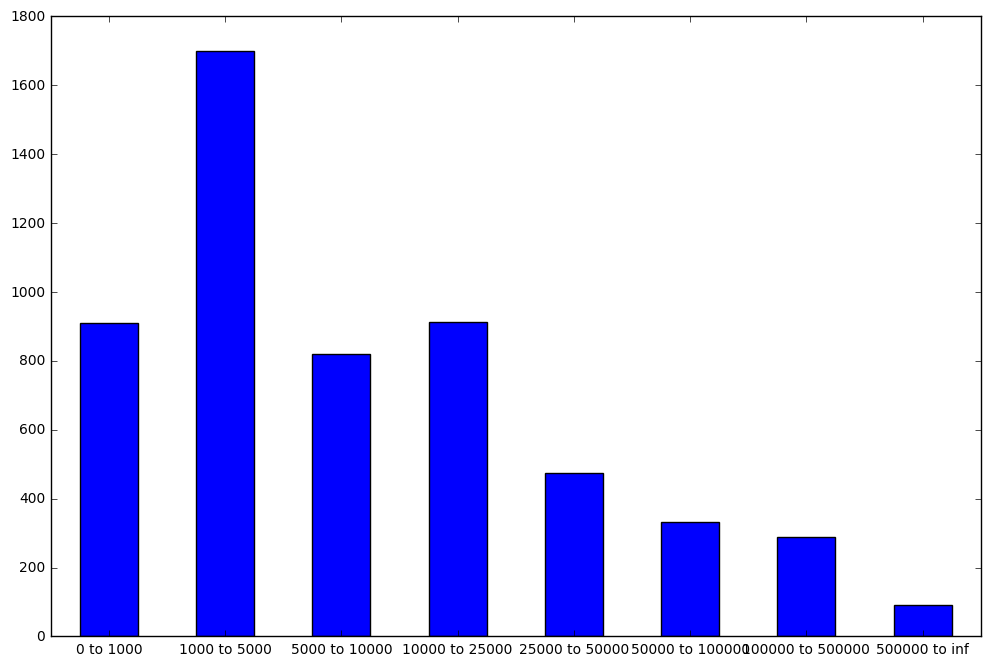

In [33]:
# Calculate the average number of followers for bot users
#
bot_average_followers = sum(bot_df['followers']) / len(bot_df)
print("Average number of followers for a bot: ", str(round(bot_average_followers, 2)))

# Calculate standard deviation of follower count
#
print("Follower count standard deviation for bots: ", bot_df['followers'].std())

# Calculate the range of follower count
#
bot_max_followers = bot_df['followers'].max()
bot_min_followers = bot_df['followers'].min()
print("Bot followers range from ",bot_min_followers, "-", bot_max_followers)

# Graph the frequency of each tweet count bin
#
out = pd.cut(bot_df['followers'], bins=[0, 1000, 5000, 10000, 25000, 50000, 100000, 500000, math.inf], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,8))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()